## Exploração dos dados obtidos via API Strava 😄👩‍💻🚀

Neste notebook, mergulhamos nos dados fornecidos pela API Strava para extrair insights valiosos sobre atividades físicas variadas. A API Strava é uma ferramenta poderosa que nos dá acesso a um vasto conjunto de informações detalhadas, abrangendo desde ciclismo e natação até corridas e muito mais. As métricas analisadas incluem, mas não se limitam a, distância percorrida, duração da atividade, ganho de elevação e frequência cardíaca.

A seleção de dados para este notebook foi realizada mantendo apenas aqueles dados relevantes para as questões propostas 🎯. Além disso, um processo de limpeza foi aplicado para garantir a precisão e a qualidade das análises. O foco está em extrair *insights* relevantes que possam responder a perguntas específicas sobre padrões de atividades físicas, tendências ao longo do tempo e comportamento dos atletas 🏅.

Com a combinação de métodos estatísticos e visualizações gráficas, este notebook busca não apenas responder a perguntas predefinidas, mas também descobrir novas perspectivas e histórias contadas pelos dados 📊📈.

✨ **Os dados a seguir foram extraídos de uma conta de um atleta amador do Strava.** ✨

##### 📚 Importando as bibliotecas

In [1]:
# Importação de bibliotecas
import os
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np
from itertools import *
from dateutil.relativedelta import relativedelta

# Configurações globais para visualizações
%matplotlib inline
#sns.set_theme(style="darkgrid")

caminho_usuario = os.path.expanduser('~')
file = 'Desktop\\codigos\\Python\\Strava_PB_PY\\PY_PB_Strava\\data\\processed\\data.csv'
arquivo = os.path.join(caminho_usuario, file)

##### 📁 Carregamento dos dados no dataframe df

In [2]:
df = pd.read_csv(arquivo)

##### 🔍 Análise Exploratória de Dados (EDA)

##### O arquivo contém as seguintes variáveis
    
*   **name:** O nome dado à atividade pelo usuário.
*   **distance:** A distância total percorrida durante a atividade, geralmente em metros.
*   **moving_time:** O tempo total em movimento, excluindo as paradas, geralmente em segundos.
*   **elapse_time:** O tempo total decorrido desde o início até o fim da atividade, incluindo todas as paradas, geralmente em segundos.
*   **total_elevation_gain:** O ganho total de elevação durante a atividade, 0geralmente em metros.
*   **sport_type:** Um campo mais específico que detalha o tipo de esporte dentro de uma categoria de atividade.
*   **start_date_local:** A data e hora de início da atividade.
*   **achievement_count:** O número de conquistas ganhas durante a atividade.
*   **kudos_count:** O número curtidas que a atividade recebeu.
*   **comment_count:** O número de comentários feitos na atividade.
*   **photo_count:** O número de fotos associadas à atividade.
*   **average_speed:** A velocidade média durante a atividade, geralmente em metros por segundo.
*   **max_speed:** A velocidade máxima atingida durante a atividade.
*   **average_heartrate:** A frequência cardíaca média durante a atividade.
*   **max_heartrate:** A frequência cardíaca máxima alcançada durante a atividade.
*   **elev_high:** A maior elevação alcançada durante a atividade.
*   **elev_low:** A menor elevação durante a atividade.
*   **pr_count:** O número de recordes pessoais alcançados durante a atividade.

In [3]:
# Resumo estatístico das variáveis numéricas
df.describe()

,distance,moving_time,elapsed_time,total_elevation_gain,id,achievement_count,kudos_count,comment_count,photo_count,average_speed,max_speed,average_heartrate,max_heartrate,elev_high,elev_low,pr_count,duracao_atividade,ano,mes
count,637.000000,637.000000,637.000000,637.000000,6.370000e+02,637.000000,637.000000,637.000000,637.0,637.000000,637.000000,631.000000,631.000000,637.000000,637.000000,637.000000,637.000000,637.000000,637.000000
mean,3.214088,2995.725275,3073.659341,25.200628,1.006672e+10,0.676609,1.486656,0.012559,0.0,5.961702,9.969881,129.830428,157.708399,441.660754,421.679435,0.281005,2995.725275,2023.312402,6.219780
std,4.294580,2167.101302,2195.788583,38.916546,1.102515e+09,3.566392,1.994937,0.167761,0.0,4.709718,9.237649,27.619682,25.161899,420.566233,401.402681,2.223623,2167.101302,0.530266,3.153622
min,0.000000,20.000000,23.000000,0.000000,8.069022e+09,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,2022.000000,1.000000
25%,0.000000,1230.000000,1280.000000,0.000000,9.266683e+09,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,106.000000,142.000000,0.000000,0.000000,0.000000,1230.000000,2023.000000,4.000000
50%,0.750000,2849.000000,2970.000000,2.400000,9.876151e+09,0.000000,1.000000,0.000000,0.0,8.096400,12.258000,133.900000,163.000000,812.900000,777.200000,0.000000,2849.000000,2023.000000,6.000000
75%,6.016500,4399.000000,4493.000000,41.700000,1.083358e+10,0.000000,2.000000,0.000000,0.0,9.331200,14.817600,153.900000,177.000000,839.800000,801.900000,0.000000,4399.000000,2024.000000,9.000000
max,24.075400,11458.000000,11606.000000,250.900000,1.246247e+10,75.000000,18.000000,3.000000,0.0,16.286400,46.184400,174.400000,190.000000,1422.000000,1319.100000,39.000000,11458.000000,2024.000000,12.000000


In [4]:
# Resumo sobre o dataframe, nome das colunas, quantidade dos não nulos e o tipo dos dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 637 entries, 0 to 636
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   name                  637 non-null    object 
 1   distance              637 non-null    float64
 2   moving_time           637 non-null    int64  
 3   elapsed_time          637 non-null    int64  
 4   total_elevation_gain  637 non-null    float64
 5   sport_type            637 non-null    object 
 6   id                    637 non-null    int64  
 7   start_date_local      637 non-null    object 
 8   achievement_count     637 non-null    int64  
 9   kudos_count           637 non-null    int64  
 10  comment_count         637 non-null    int64  
 11  photo_count           637 non-null    int64  
 12  average_speed         637 non-null    float64
 13  max_speed             637 non-null    float64
 14  average_heartrate     631 non-null    float64
 15  max_heartrate         6

In [5]:
# Amostra dos dados, contendo as 5 primeiras linhas do dataframe
df.head()

,name,distance,moving_time,elapsed_time,total_elevation_gain,sport_type,id,start_date_local,achievement_count,kudos_count,...,max_speed,average_heartrate,max_heartrate,elev_high,elev_low,pr_count,data,duracao_atividade,ano,mes
0,Treinamento com peso vespertino,0.0,4824,4824,0.0,Treino com peso,12462472904,2024-09-20 17:18:14+00:00,0,0,...,0.0,126.7,176.0,0.0,0.0,0,20-09-2024,4824,2024,9
1,Treinamento com peso vespertino,0.0,3739,3739,0.0,Treino com peso,12462472909,2024-09-19 17:23:18+00:00,0,0,...,0.0,101.1,132.0,0.0,0.0,0,19-09-2024,3739,2024,9
2,Treinamento com peso vespertino,0.0,5256,5256,0.0,Treino com peso,12462472932,2024-09-18 17:23:18+00:00,0,0,...,0.0,118.5,165.0,0.0,0.0,0,18-09-2024,5256,2024,9
3,Treinamento com peso vespertino,0.0,5267,5267,0.0,Treino com peso,12462472927,2024-09-17 17:26:53+00:00,0,0,...,0.0,97.8,173.0,0.0,0.0,0,17-09-2024,5267,2024,9
4,Treinamento com peso vespertino,0.0,5408,5408,0.0,Treino com peso,12431438210,2024-09-16 17:20:26+00:00,0,0,...,0.0,104.7,155.0,0.0,0.0,0,16-09-2024,5408,2024,9


👀 Nota-se que não há valores em branco/nulos, os dados não são somente números, há objetos, como por exemplo nome da atividade, tipo do esporte. 
*   Percebemos que a maior quilometragem alcansada foi de 24km;
*   O maior ganho de elevação foi de 250 metros;
*   Foram alcançados no máximo 39 recordes pessoais em uma atividade;
*   O ritmo cardiaco chegou aos 190 bpm;
*   A maior duração de uma atividade foi de 3 horas 13 minutos e 26 segundos;
*   Há diversos tipos de atividades nesta base, como: corrida, treino com peso, como podemos observar nas 5 primeiras linhas do comando *head()*.

#### 📊👀 **Análise Visual dos Dados de Atividades Físicas**
Vamos explorar os dados através de gráficos interativos que respondam às seguintes perguntas:
- 📅 Quantas atividades foram feitas neste ano? ✅
- 🏃‍♂️ Qual está sendo a atividade física mais praticada este ano? ✅
- 📅 Quantas atividades foram feitas mês a mês em 2024 e 2023? ✅
- 🏃‍♂️ Qual foi a atividade física mais praticada em 2023? ✅
- 📅 Quantas atividades foram feitas neste mês? ✅
- 🏃‍♀️ Qual está sendo a atividade física mais praticada neste mês? ✅
- 📅 Quantos dias em movimento mês a mês com a linha de média? ✅
- 📅 Quantas atividades por tipo de esporte foram feitas mês a mês? ✅
- ⏱️ Qual é o tempo em movimento mês a mês? ✅
- 🔄 Qual é o tempo em movimento mês a mês por atividade física? ✅
- 📏 Quais são as distâncias percorridas mês a mês? ✅
- ⛰️ Quais são os ganhos de elevação mês a mês? ✅
- 📏 Distância vs Ganho de Elevação. ✅ 
- 📏 Frequência cardíaca vs Ganho de Elevação. ✅
- 📏 Velocidade Média vs Batimentos cardíacos Médios. ✅
- 📏 Evolução da Velocidade Média. ✅
- 📅 Qual quilometragem foram feitas por semana? ✅ 
- 📅 Qual o tempo em movimento por semana? ✅
- 📅 Qual elevação feita por semana? ✅
- Qual o dia da semana com treinos mais pesados?
- Qual o dia da semana com mais kms rodados?
- Qual dia da semana com mais atividade?
- Dias da semana com mais tempo treinando?
- Dias da semana com mais esforço?
- Dias da semana mais faltantes?


In [6]:
# Converta 'start_date_local' e 'data' para datetime e extraia o mês e o ano
df['start_date_local'] = pd.to_datetime(df['start_date_local'])
df['data'] = pd.to_datetime(df['data'], format='%d-%m-%Y', dayfirst=True)

#### Atividades Anuais: O Poder da Consistência 📈

In [7]:
# Vários dias são repetidos, o que aconteceu?
df_count = df.groupby(['data', 'sport_type'])['ano'].count().reset_index()
df_count.columns = ['data', 'esporte', 'quantidade']
df_count[df_count['quantidade'] > 2]

,data,esporte,quantidade
27,2023-01-11,Corrida,3
104,2023-05-19,Corrida,7
113,2023-06-02,Corrida,11
118,2023-06-09,Corrida,14
122,2023-06-14,Corrida,6
130,2023-06-23,Corrida,10
138,2023-07-03,Corrida,7
142,2023-07-07,Corrida,11
153,2023-07-21,Corrida,5
161,2023-07-31,Corrida,16


In [8]:
# Função para filtrar dados por período
def filtrar_por_periodo(df, data_inicial, data_final):
    return df[(df['data'] >= data_inicial) & (df['data'] <= data_final)]

In [9]:
'''
Analisar 20223 / 2024
'''
# Definir período atual e do ano passado
data_atual = datetime.now() - timedelta(days=0)

primeiro_dia_ano_atual = data_atual.replace(month=1, day=1)
ultimo_dia_ano_atual = df['data'].max()

# Filtrar períodos
df_periodo_atual = filtrar_por_periodo(df, primeiro_dia_ano_atual, ultimo_dia_ano_atual)
df_periodo_anterior = filtrar_por_periodo(df, primeiro_dia_ano_atual - relativedelta(years=1), ultimo_dia_ano_atual - relativedelta(years=1))

# Combinar dados dos dois períodos
df_combinado = pd.concat([df_periodo_atual, df_periodo_anterior], ignore_index=True)

In [10]:
data_atual

datetime.datetime(2024, 10, 7, 11, 51, 21, 669419)

In [11]:
'''
Durante um período, o atleta registrava seus treinos de uma maneira específica:
Iniciava o cronômetro durante o aquecimento e o parava ao terminar;
Fazia o mesmo ao começar o treino principal e, novamente, ao finalizá-lo;
E seguia o mesmo procedimento para o desaquecimento. 
Assim, resultava em três registros distintos para o mesmo treino no mesmo dia.

Logo, fizemos apenas um treino, somando as distâncias, duração, ganho em elevação,
a média de velocidade, média batimentos cardíacos, máxima velocidade e a máxima batimentos
cardíacos.

'''
# Regras de agregação para 'corrida'
regras_de_agregacao = {
    'distance': 'sum',
    'duracao_atividade': 'sum',
    'total_elevation_gain': 'sum',
    'max_speed': 'max',
    'max_heartrate': 'max',
    'average_speed': 'mean',
    'average_heartrate': 'mean',
    'achievement_count': 'sum',
    'kudos_count': 'sum',
    'comment_count': 'sum',
    'photo_count': 'sum',
    'elev_high': 'max',
    'elev_low': 'min',    
    'pr_count': 'sum'    

}

# Agregar dados para 'corrida'
df_corrida_agregado = df_combinado[df_combinado['sport_type'] == 'Corrida'].groupby(['data', 'sport_type']).agg(regras_de_agregacao).reset_index()

# Adicionar colunas 'ano' e 'mes'
df_corrida_agregado['ano'] = df_corrida_agregado['data'].dt.year
df_corrida_agregado['mes'] = df_corrida_agregado['data'].dt.month

# Separar dados que não são 'corrida'
df_outros_esportes = df_combinado[df_combinado['sport_type'] != 'Corrida']

In [12]:
df_outros_esportes = df_outros_esportes[['data', 'sport_type', 'distance', 'duracao_atividade',
       'total_elevation_gain', 'max_speed', 'max_heartrate', 'average_speed',
       'average_heartrate', 'achievement_count', 'kudos_count',
       'comment_count', 'photo_count', 'elev_high', 'elev_low', 'pr_count',
       'ano', 'mes']]

In [13]:
# Combinar todos os dados
df_final = pd.concat([df_corrida_agregado, df_outros_esportes])
df_final['ano_mes'] = df_final['data'].dt.strftime('%m-%Y')

In [14]:
# 📅 Quantas atividades foram feitas neste ano?
ano_atual = pd.Timestamp('today').year
atividades_ano = df_final[df_final['ano'] == ano_atual]
print(f"Atividades neste ano: {atividades_ano.shape[0]}")

Atividades neste ano: 211


In [15]:
# 🏃‍♂️ Qual está sendo a atividade física mais praticada este ano?
atividade_mais_praticada_ano = atividades_ano['sport_type'].value_counts()
print(f"Atividade mais praticada este ano: {atividade_mais_praticada_ano.idxmax()}")

Atividade mais praticada este ano: Treino com peso


In [16]:
# Contagem de atividades por tipo de esporte
contagem_atividades_ano = atividades_ano['sport_type'].value_counts().reset_index()
contagem_atividades_ano.columns = ['Tipo de atividade', 'Quantidade de atividades']

# Gráfico de barras com a contagem de atividades por tipo de esporte
fig = px.bar(contagem_atividades_ano, x='Tipo de atividade', y='Quantidade de atividades',
              title=f"Atividades Físicas Mais Praticadas Neste Ano ({pd.Timestamp('today').year})")

# Adicione rótulos de dados às barras
fig.update_traces(texttemplate='%{y}')
fig.update_layout(barmode='group', xaxis_tickangle=45)

fig.show()
fig.write_image("../reports/img/atividades2024.png")

Esse gráfico é útil para identificar as preferências de exercícios e pode ajudar a entender as tendências de atividades físicas dentro de um determinado período, neste caso, dentro do ano atual.

In [17]:
# 📅 Quantas atividades foram feitas ano passado?
atividades_ano_passado = df_final[df_final['ano'] == pd.Timestamp('today').year - 1]
print(f"Atividades ano passado (mesmo período 2024): {atividades_ano_passado.shape[0]}")

Atividades ano passado (mesmo período 2024): 183


In [18]:
# 🏃‍♂️ Qual foi a atividade física mais praticada ano passado?
atividade_mais_praticada_ano_passado = atividades_ano_passado['sport_type'].value_counts()
print(f"Atividade mais praticada ano passado (mesmo período 2024): {atividade_mais_praticada_ano_passado.idxmax()}")

atividade_mais_praticada_ano_passado = atividade_mais_praticada_ano_passado.reset_index()

Atividade mais praticada ano passado (mesmo período 2024): Corrida


In [19]:
# Contagem de atividades por tipo de esporte
atividade_mais_praticada_ano_passado.columns = ['Tipo de atividade', 'Quantidade de atividades']

# Gráfico de barras com a contagem de atividades por tipo de esporte
fig = px.bar(atividade_mais_praticada_ano_passado, x='Tipo de atividade', y='Quantidade de atividades', title=f"Atividades Físicas Mais Praticadas Ano ({pd.Timestamp('today').year - 1})")

# Adicione rótulos de dados às barras
fig.update_traces(texttemplate='%{y}')
fig.update_layout(barmode='group', xaxis_tickangle=45)

fig.show()
fig.write_image("../reports/img/atividades2023.png")

In [20]:
# Comparando mesmo período 2023 / 2024
df_group = df_final.groupby(['ano', 'mes'])['data'].count().reset_index()
df_group.columns = ['Ano', 'Mês', 'Quantidade']

# Crie o gráfico de barras comparando mês a mês
fig = px.bar(df_group, x='Mês', y='Quantidade', color='Ano', barmode='group',
             title='Comparação de Esportes Praticados Mês a Mês (2023 vs. 2024)')


# Adicione rótulos de dados às barras
fig.update_traces(texttemplate='%{y}')

fig.show()

fig.write_image("../reports/img/comparacao23_24_total.png")

Observa-se que nos meses de janeiro e fevereiro de 2024 houve um aumento na atividade física em comparação com o ano anterior. No entanto, em março/abril/maio, devido a uma lesão, houve uma diminuição nas atividades físicas. Em abril, o indivíduo retomou a prática de exercícios físicos de baixo impacto, superando até mesmo os níveis do ano passado. Por fim, em junho, os valores estão equiparados dos registrados em 2023. Com uma nova lesão a partir de julho houve uma diminuida, mas não parou. Em agosto uma nova lesão resultando em mais diminuição nos exercícios praticados.

In [21]:
# Comparando mesmo período 2023 / 2024 segmentado por esporte
df_group = df_final.groupby(['ano', 'mes', 'sport_type'])['data'].count().reset_index()
df_group.columns = ['Ano', 'Mês', 'Esporte', 'Quantidade']

# Crie o gráfico de barras comparando mês a mês
fig = px.bar(df_group, x='Mês', y='Quantidade', color='Esporte', barmode='group',
             title='Comparação de Esportes Praticados Mês a Mês (2023 vs. 2024)', facet_col='Ano')


# Adicione rótulos de dados às barras
fig.update_traces(texttemplate='%{y}')

fig.show()

fig.write_image("../reports/img/comparacao23_24.png")

#### A Corrida Continua 🏆

In [22]:
# 🏃‍♂️ Corrida - comparação 2023 / 2024
df_corrida = df_final[df_final['sport_type'] == 'Corrida']
df_corrida = df_corrida.groupby(['ano', 'mes'])['data'].count().reset_index()
df_corrida.columns = ['Ano', 'Mês', 'Quantidade']

# Crie o gráfico de barras comparando mês a mês
fig = px.bar(df_corrida, x='Mês', y='Quantidade', color='Ano', barmode='group',
             title='Comparação de Quantidade de Corridas por Mês (2023 vs. 2024)')

# Adicione rótulos de dados às barras
fig.update_traces(texttemplate='%{y}')

fig.show()
fig.write_image("../reports/img/comp_corrida23_24.png")

Observamos que essa comparação e a anterior mostram os mesmos parâmetros, conforme afirmado na resposta anterior: em 2023 a atividade de corrida foi o ponto central desse indivíduo. No entanto, o individuo teve várias lesões no ano como ocorreu no mês de março/abril/junho/agosto/setembro e retornando aos poucos em outubro/2024.

#### Análise Mensal: Ritmo e Recuperação 🗓️

In [23]:
mes = (pd.Timestamp('today').month - 1)
mes

9

In [24]:
# 📅 Quantas atividades foram feitas neste mês? ✅
condicao = ((df_final['mes'] == mes) & (df_final['ano'] == pd.Timestamp('today').year))
atividades_mes = df_final[condicao.reindex(df_final.index)]

print(f"Atividades neste mês: {atividades_mes.shape[0]}")

Atividades neste mês: 15


In [25]:
# 🏃‍♀️ Qual está sendo a atividade física mais praticada neste mês/ano? ✅
# Contagem de categorias e a escolha do maior
atividade_do_mes = atividades_mes['sport_type'].value_counts().idxmax()
print(f"Atividade mais praticada neste mês: {atividade_do_mes}")

Atividade mais praticada neste mês: Treino com peso


In [26]:
# Contagem de atividades por tipo de esporte
contagem_atividades = atividades_mes['sport_type'].value_counts().reset_index()
contagem_atividades.columns = ['Tipo de atividade', 'Quantidade de atividades']

# Gráfico de barras com a contagem de atividades por tipo de esporte
fig = px.bar(contagem_atividades, x='Tipo de atividade', y='Quantidade de atividades', title=f"Atividades Físicas Mais Praticadas Neste Mês ({mes})")

# Adicione rótulos de dados às barras
fig.update_traces(texttemplate='%{y}')

fig.show()

fig.write_image("../reports/img/esporte_mes.png")

Este gráfico é útil para identificar as preferências de exercícios e pode ajudar a entender as tendências de atividades físicas dentro de um determinado período, neste caso dentro do mês atual.

In [27]:
# Análise Corrida Mês Atual
df_corrida_mes = atividades_mes[atividades_mes['sport_type'] == 'Corrida']

# Kms
df_kms = df_corrida_mes.groupby(['data'])['distance'].sum().reset_index()
df_kms['dia_da_semana'] = df_kms['data'].dt.strftime('%A')
df_kms['dia_da_semana'] = df_kms['dia_da_semana'].replace({
    'Monday': 'Segunda-Feira',
    'Tuesday': 'Terça-Feira',
    'Wednesday': 'Quarta-Feira',
    'Thursday': 'Quinta-Feira',
    'Friday': 'Sexta-Feira',
    'Saturday': 'Sábado',
    'Sunday': 'Domingo'
})
# Reordena os dias da semana para começar na segunda-feira
df_kms['dia_da_semana'] = pd.Categorical(df_kms['dia_da_semana'], 
                                         categories=['Segunda-Feira', 'Terça-Feira', 'Quarta-Feira', 'Quinta-Feira', 'Sexta-Feira', 'Sábado', 'Domingo'], ordered=True)
df_kms['numero_da_semana'] = df_kms['data'].dt.isocalendar().week

In [28]:
df_km_mean = df_kms.groupby('dia_da_semana')['distance'].mean().reset_index()
df_km_mean.columns = ['Dia da semana', 'Distância média (km)']

# Gráfico com as distâncias médias por dia da semana neste mês
fig = px.bar(df_km_mean, x='Dia da semana', y='Distância média (km)',
             title='Distância média percorrida por dia da semana no mês atual')

# Rotulo de dados
fig.update_traces(texttemplate='%{y}')
             
fig.show()

fig.write_image("../reports/img/distancia_media_mes.png")

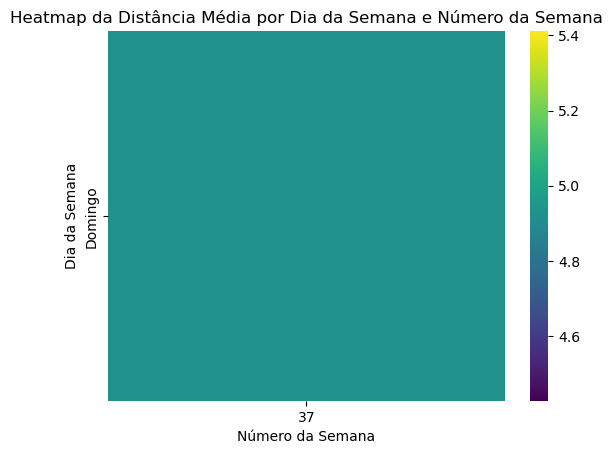

In [29]:
heatmap_data = df_kms.pivot_table(index='dia_da_semana', columns='numero_da_semana', values='distance', aggfunc='mean')
sns.heatmap(heatmap_data, cmap='viridis')
plt.title('Heatmap da Distância Média por Dia da Semana e Número da Semana')
plt.xlabel('Número da Semana')
plt.ylabel('Dia da Semana')
#plt.yticks(range(7), ['Seg', 'Ter', 'Qua', 'Qui', 'Sex', 'Sáb', 'Dom'], rotation=0)
plt.show()


In [30]:
# Análise Corrida Mês Atual
df_treino_mes = atividades_mes[atividades_mes['sport_type'] == 'Treino com peso']

# Kms
df_treinos = df_treino_mes.groupby(['data'])['duracao_atividade'].sum().reset_index()
df_treinos['dia_da_semana'] = df_treinos['data'].dt.strftime('%A')
df_treinos['dia_da_semana'] = df_treinos['dia_da_semana'].replace({
    'Monday': 'Segunda-Feira',
    'Tuesday': 'Terça-Feira',
    'Wednesday': 'Quarta-Feira',
    'Thursday': 'Quinta-Feira',
    'Friday': 'Sexta-Feira',
    'Saturday': 'Sábado',
    'Sunday': 'Domingo'
})
# Reordena os dias da semana para começar na segunda-feira
df_treinos['dia_da_semana'] = pd.Categorical(df_treinos['dia_da_semana'], 
                                         categories=['Segunda-Feira', 'Terça-Feira', 'Quarta-Feira', 'Quinta-Feira', 'Sexta-Feira', 'Sábado', 'Domingo'], ordered=True)
df_treinos['numero_da_semana'] = df_treinos['data'].dt.isocalendar().week

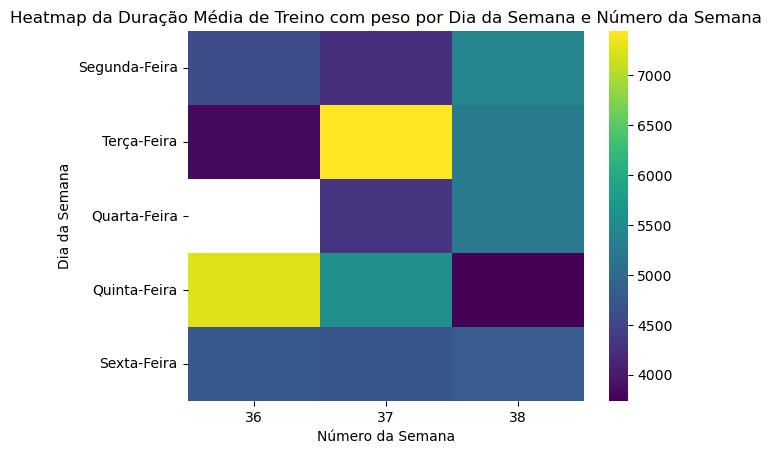

In [31]:
# Análise Treino com Peso Mês Atual
heatmap_data = df_treinos.pivot_table(index='dia_da_semana', columns='numero_da_semana', values='duracao_atividade', aggfunc='mean')
sns.heatmap(heatmap_data, cmap='viridis')
plt.title('Heatmap da Duração Média de Treino com peso por Dia da Semana e Número da Semana')
plt.xlabel('Número da Semana')
plt.ylabel('Dia da Semana')
#plt.yticks(range(7), ['Seg', 'Ter', 'Qua', 'Qui', 'Sex', 'Sáb', 'Dom'], rotation=0)
plt.show()

#### Análise sob um período de tempo (mês-mês) 🗓️

In [32]:
df['ano_mes'] = df['data'].dt.strftime('%Y-%m')

In [33]:
# 📅 Quantos dias em movimento mês a mês com a linha de média? ✅
# Preparar os dados
# df_final['ano_mes'] = df_final['data'].dt.strftime('%m-%Y')

# Agrupar os dados e excluindo as datas duplicadas deixando apenas uma
# Renomeando as colunas
contagem_dias = df.groupby('ano_mes')['data'].nunique().reset_index()
contagem_dias.columns = ['Ano/Mês', 'Dias em movimento']

# Calculando a média
media = contagem_dias['Dias em movimento'].mean()

# Ordenando os dados
contagem_dias['Ano/Mês'] = pd.to_datetime(contagem_dias['Ano/Mês'], format='%Y-%m')
contagem_dias.sort_values(by='Ano/Mês', inplace=True)
contagem_dias['Ano/Mês'] = contagem_dias['Ano/Mês'].dt.strftime('%Y-%m')

# Plotar o gráfico
fig = px.bar(contagem_dias, x='Ano/Mês', y='Dias em movimento', title='Dias em Movimento Mês à Mês')
fig.add_hline(y=media, line_dash="dot", annotation_text="", annotation_position="bottom right")

# Adicionar rótulo de dados na linha da média
fig.add_annotation(
    xref="paper", x=1, y=media,
    text=f"Média: {media:.0f} dias",
    showarrow=False,
    yshift=10,
    bordercolor='red',
    bgcolor='pink')

# Mostrar o gráfico
fig.show()

fig.write_image("../reports/img/dias_em_movimento.png")


Analisando o gráfico ‘Dias em Movimento Mês à Mês’, podemos observar que o número de dias em movimento varia consideravelmente de um mês para outro. A maioria dos meses está próxima da média de 20 dias, mas há variações significativas.

*   De novembro de 2022 a maio de 2023, os valores estão abaixo da média. Isso pode ser explicado pelo fato de que o indivíduo estava iniciando seus treinos e gradualmente estabelecendo uma rotina.
*   Em junho de 2023, houve uma estabilização, indicando que o hábito de atividade física estava se consolidando.
*   Em março de 2024, houve uma queda acentuada. Isso pode estar relacionado a uma lesão ou algum evento específico.
*   No entanto, em abril de 2024, o indivíduo retomou as atividades e superou a média, alcançando mais de 20 dias em movimento.
*   E nos últimos meses estava em queda, por motivos de lesão.

In [34]:
# 📅 Quantas atividades por tipo de esporte foram feitas mês a mês?
# Agrupar os dados por 'ano_mes' e 'sport_type'
atividades_por_tipo = df.groupby(['ano_mes', 'sport_type']).size().reset_index(name='Quantidade')
atividades_por_tipo.columns = ["Ano/Mês", "Tipo de esporte", "Quantidade"]

# Ordenar os dados
atividades_por_tipo['Ano/Mês'] = pd.to_datetime(atividades_por_tipo['Ano/Mês'], format='%Y-%m')
atividades_por_tipo.sort_values(by='Ano/Mês', inplace=True)
atividades_por_tipo['Ano/Mês'] = atividades_por_tipo['Ano/Mês'].dt.strftime('%Y-%m')

# Plotar o gráfico de barras
fig = px.histogram(atividades_por_tipo, x='Ano/Mês', y='Quantidade', 
             title='Quantidade de Atividades por Tipo de Esporte Mês a Mês', facet_col='Tipo de esporte')

fig.update_traces(texttemplate='%{y}')

# Mostrar o gráfico
fig.show()
fig.write_image("../reports/img/quantidade_atividade_tipo_mes_mes.png")


Com base no gráfico “Quantidade de Atividades por Tipo de Esporte Mês a Mês”, podemos tirar algumas conclusões:

*   Variação Mensal: O número de atividades por tipo de esporte varia ao longo dos meses. Alguns esportes têm maior frequência em determinados meses.
*   Esportes Mais Praticados: A atividade de corrida (running) e treino com peso parece ser as mais frequentes na maioria dos meses.
*   Observa-se uma tendência sazonal, onde alguns esportes têm picos em determinados meses ou estações.
*   Diversidade de Esportes: O gráfico mostra que diferentes tipos de esporte são praticados regularmente, incluindo treino com peso, caminhada, natação, bicicleta e simulador de escadas.
*   Podemos concluir que o foco deste indivíduo é a corrida e treino com peso.

In [35]:
# 🔄 Qual é o tempo em movimento mês a mês por atividade física? ✅
# Agrupar os dados por 'ano_mes' e 'sport_type'
tempo_em_movimento_por_atividade = df_final.groupby(['ano_mes', 'sport_type'])['duracao_atividade'].sum().reset_index()

# Ordenar os dados
tempo_em_movimento_por_atividade['ano_mes'] = pd.to_datetime(tempo_em_movimento_por_atividade['ano_mes'], format='%m-%Y')
tempo_em_movimento_por_atividade.sort_values(by='ano_mes', inplace=True)
tempo_em_movimento_por_atividade['ano_mes'] = tempo_em_movimento_por_atividade['ano_mes'].dt.strftime('%m-%Y')

# Converter 'duracao_segundos' de segundos para horas
tempo_em_movimento_por_atividade['duracao_horas'] = tempo_em_movimento_por_atividade['duracao_atividade'] / 3600
tempo_em_movimento_por_atividade.columns = ["Mês/Ano", "Tipo de esporte", "Tempo (s)", "Tempo (h)"]

# Plotar o gráfico de barras
fig = px.bar(tempo_em_movimento_por_atividade, x='Mês/Ano', y='Tempo (h)', color='Tipo de esporte',
             title='Tempo em Movimento Mês a Mês por Atividade Física (Horas)')

# Mostrar o gráfico
fig.show()
fig.write_image("../reports/img/tempo_movimento_por_atividade.png")

O gráfico ‘Tempo em Movimento Mês a Mês’ apresenta as variações no tempo de atividade física ao longo do período analisado:

*   Tempo: Representa os meses e anos, variando de janeiro/2023 a setembro/2023 e janeiro/2024 a setembro/2024.
*   Horas: A escala vertical mede o tempo em horas dedicado à atividade física.
*   Padrões de Tempo em Movimento:
    *   O gráfico mostra picos e vales, indicando períodos com mais ou menos tempo em movimento.
    *   Não há uma tendência linear clara; o tempo em movimento varia de forma irregular.
*   Observações Específicas:
    *   Maio de 2023: A redução no tempo em movimento pode ser atribuída às férias/lesões, contudo analisando os meses seguintes está mais para férias que lesões.
    *   Março de 2024: Lesão provavelmente, pois o nivel da atividade corrida caiu consideravelmente, melhorando nos meses seguintes.
    *   Setembro 2024: Lesão provavelmente, pois novamente o nível de corrida desceu e o de treino com peso subiu consideravelmente.
    *   Podemos concluir que sempre que corrida desce, treino ocm peso sobe.

Observamos que, na maioria dos meses, os esportes predominantes são corrida e treino com peso. No entanto, a partir de abril de 2024, notamos uma diversificação nos tipos de atividades. Nesse mesmo mês, a corrida não foi registrada, pois o indivíduo estava explorando outras modalidades. Em maio de 2024, a corrida foi retomada, mas o indivíduo continuou praticando outras atividades. Embora a corrida seja a mais frequente, em termos de tempo de movimento, o treino com peso é equiparado ou até supera em certas épocas.

In [36]:
# 📏 Quais são as distâncias percorridas mês a mês? ✅
# Agrupar os dados por 'ano_mes' e somar a 'distance'
distancias_percorridas = df_final.groupby('ano_mes')['distance'].sum().reset_index()

# Calcular distância média
media = distancias_percorridas['distance'].mean()

# Ordenar os dados
distancias_percorridas['ano_mes'] = pd.to_datetime(distancias_percorridas['ano_mes'], format='%m-%Y')
distancias_percorridas.sort_values(by='ano_mes', inplace=True)
distancias_percorridas['ano_mes'] = distancias_percorridas['ano_mes'].dt.strftime('%m-%Y')
distancias_percorridas.columns = ["Mês/Ano", "Soma das distâncias"]

# Plotar o gráfico de barras
fig = px.bar(distancias_percorridas, x='Mês/Ano', y='Soma das distâncias', title='Distâncias Percorridas Mês a Mês')
fig.add_hline(y=media, line_dash="dot", annotation_text="", annotation_position="bottom right")

# Adicionar rótulo de dados na linha da média
fig.add_annotation(
    xref="paper", x=1, y=media,
    text=f"Média: {media:.0f} Km/mês",
    showarrow=False,
    yshift=10,
    bordercolor='red',
    bgcolor='pink')

# Mostrar o gráfico
fig.show()
fig.write_image("../reports/img/distancia_mes_mes.png")

O gráfico apresenta uma série de barras, cada uma representando uma distância específica percorrida. Os meses correspondentes estão indicados no eixo horizontal, variando de “01/2023” a “09/2024” (mesmo período). O eixo vertical representa a distância em quilômetros, variando de 0 a 180 km. As alturas das barras variam, indicando diferentes distâncias percorridas em cada mês.

Além disso, há uma linha pontilhada no gráfico, aproximadamente aos 82 km, com uma legenda à direita que diz “Média: 82 km rodados”. Isso sugere que essa é a média das distâncias percorridas ao longo desse período.

Observamos que a tendência até fevereiro de 2024 estava em crescimento. No entanto, após a lesão em março de 2024, houve uma tendência de queda até o mês de maio de 2024, quando houve o retorno às atividades de corrida.

No entanto, em junho houve outra lsão, mas que não afetou tão diretamente a corrida como pode-se ver. Contudo, em setembro outra nova lesão, e sim, esta parou o indivíduo.

In [37]:
# ⛰️ Quais são os ganhos de elevação mês a mês? ✅
# Agrupar os dados por 'ano_mes' e somar a 'distance'
distancias_percorridas = df_final.groupby('ano_mes')['total_elevation_gain'].sum().reset_index()

# Calcular distância média
media = distancias_percorridas['total_elevation_gain'].mean()

# Ordenar os dados
distancias_percorridas['ano_mes'] = pd.to_datetime(distancias_percorridas['ano_mes'], format='%m-%Y')
distancias_percorridas.sort_values(by='ano_mes', inplace=True)
distancias_percorridas['ano_mes'] = distancias_percorridas['ano_mes'].dt.strftime('%m-%Y')
distancias_percorridas.columns = ["Mês/Ano", "Soma das elevações"]

# Plotar o gráfico de barras
fig = px.bar(distancias_percorridas, x='Mês/Ano', y='Soma das elevações', title='Elevações Percorridas Mês a Mês')
fig.add_hline(y=media, line_dash="dot", annotation_text="", annotation_position="bottom right")

# Adicionar rótulo de dados na linha da média
fig.add_annotation(
    xref="paper", x=1, y=media,
    text=f"Média: {media:.0f} m/mês",
    showarrow=False,
    yshift=10,
    bordercolor='red',
    bgcolor='pink')

# Mostrar o gráfico
fig.show()
fig.write_image("../reports/img/elevacao_mes_mes.png")

In [38]:
# Qual é o tempo em movimento mês a mês?
# Agrupando pela coluna mês/ano e somando os segundos gastos na atividade
tempo_em_movimento = df_final.groupby("ano_mes")['duracao_atividade'].sum().reset_index()

# Ordenando os dados
tempo_em_movimento["ano_mes"] = pd.to_datetime(tempo_em_movimento["ano_mes"], format="%m-%Y")
tempo_em_movimento.sort_values(by="ano_mes", inplace=True)
tempo_em_movimento["ano_mes"] = tempo_em_movimento["ano_mes"].dt.strftime("%m-%Y")

# Convertendo segundos -> horas
tempo_em_movimento["duracao"] = tempo_em_movimento["duracao_atividade"] / 3600 
tempo_em_movimento.columns = ["Mês/Ano", "Duração (s)", "Duração (h)"]

# 5. Plotar o gráfico de linhas
fig = px.line(tempo_em_movimento, x='Mês/Ano', y='Duração (h)', title='Tempo em Movimento Mês a Mês')

# Mostrar o gráfico
fig.show()
fig.write_image("../reports/img/tempo_mes_mes.png")

In [39]:
df_velocidade = df_final.copy()

df_velocidade = df_velocidade[df_velocidade['sport_type'] == 'Corrida'].groupby(['ano', 'mes'])['average_speed'].median().reset_index()
#df_velocidade['data'] = pd.to_datetime(df_velocidade['year'] + '/' + df_velocidade['month'])
df_velocidade['data'] = df_velocidade['ano'].astype(str) + '/' + df_velocidade['mes'].astype(str).str.zfill(2)
df_velocidade.columns = ['Ano', 'Mês', 'Velocidade Média (km/h)', 'Ano/Mês']

media = df_velocidade['Velocidade Média (km/h)'].median()
print(f'Atualmente a média de velocidade é {media:.2f} km/hora.')

# Gráfico da evolução da velocidade
fig = px.bar(df_velocidade, x='Ano/Mês', y='Velocidade Média (km/h)', title="Evolução da velocidade média")
fig.add_hline(y=media, line_dash="dot", annotation_text="", annotation_position="bottom right")

# Adicionar rótulo de dados na linha da média
fig.add_annotation(
    xref="paper", x=1, y=media,
    text=f"Média: {media:.0f} km/hora",
    showarrow=False,
    yshift=10,
    bordercolor='red',
    bgcolor='pink')
fig.show()
fig.write_image("../reports/img/velocidade_mes_mes.png")


Atualmente a média de velocidade é 8.83 km/hora.


Observe que o acúmulo de pontos entre 8 e 10 na velocidade média é explicado pela média da velocidade ser 9 km/h. Os pontos que estão acima ou abaixo dessa média podem estar relacionados a treinos de tiro, aquecimento e desaquecimento, ou seja, ao tipo de treino realizado.

#### Correlações entre Métricas:
Correlações entre diferentes métricas.
*   A distância percorrida está relacionada à elevação? 
*   A frequência cardíaca média afeta a velocidade média?
*   A frequência cardíaca e a elevação?

In [40]:
def calcula_correlacao(df, colunaA, colunaB):
    return df[colunaA].corr(df[colunaB])

df_corrida = df_final.copy()
df_corrida = df_corrida[df_corrida['sport_type'] == 'Corrida']

print(f"Correlação entre distância e elevação = {calcula_correlacao(df_corrida, 'distance', 'total_elevation_gain')}")
print(f"Correlação entre frequência cardíaca e velocidade = {calcula_correlacao(df_corrida, 'average_heartrate', 'average_speed')}")
print(f"Correlação entre frequência cardíaca e elevação = {calcula_correlacao(df_corrida, 'average_heartrate', 'total_elevation_gain')}")


Correlação entre distância e elevação = 0.5413610589073868
Correlação entre frequência cardíaca e velocidade = 0.09775340442962756
Correlação entre frequência cardíaca e elevação = 0.14268980147490518


*   Correlação entre distância e elevação:
    A correlação positiva sugere que, em média, quanto maior a distância percorrida, maior a elevação total. Por exemplo, se você está correndo ou pedalando por uma trilha longa, é provável que haja mais subidas e descidas. No entanto, lembre-se de que correlação não implica causalidade. Outros fatores podem estar envolvidos.
*   Correlação entre frequência cardíaca e velocidade: Essa correlação negativa sugere que, em média, à medida que a velocidade aumenta, a frequência cardíaca tende a diminuir. No entanto, é importante observar que a velocidade média do atleta está abaixo de 10 km/h. Isso pode indicar que, quando a velocidade é maior, o atleta está realizando treinos de tiro de curtas distâncias, os quais não elevam significativamente a frequência cardíaca. Portanto, para chegar a uma conclusão definitiva, é necessário considerar outros fatores.

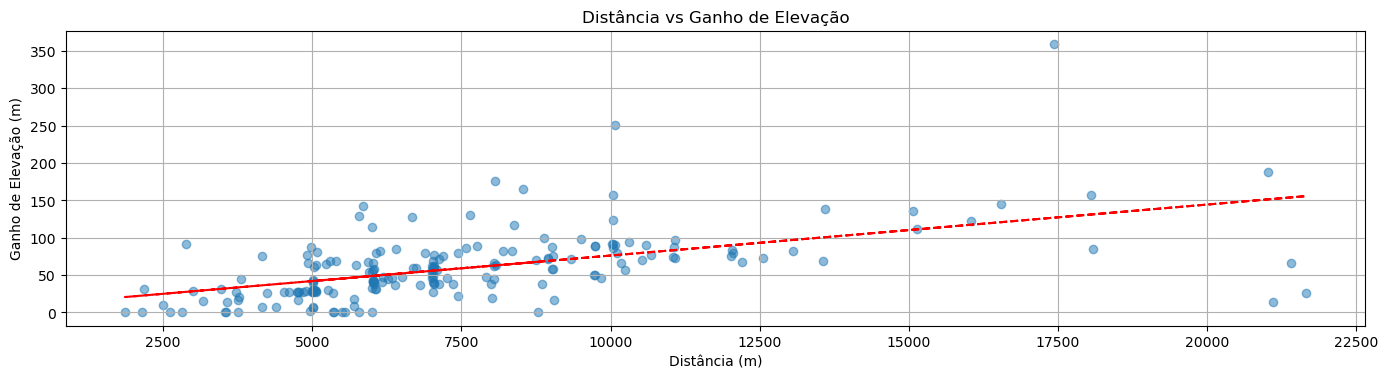

In [41]:
# Distância vs Elevação
df_calc = df_final[(df_final['sport_type'] == "Corrida")].copy()

# Convertendo km -> m
df_calc['distance'] = df_calc['distance'] * 1000 

# Gráfico para distância vs elevação
plt.figure(figsize=(14, 7))
plt.subplot(2, 1, 1)
plt.scatter(df_calc['distance'], df_calc['total_elevation_gain'], alpha=0.5)
plt.title('Distância vs Ganho de Elevação')
plt.xlabel('Distância (m)')
plt.ylabel('Ganho de Elevação (m)')
plt.grid(True)

# Adicione a linha de tendência (regressão linear)
z = np.polyfit(df_calc['distance'], df_calc['total_elevation_gain'], 1)
p = np.poly1d(z)
plt.plot(df_calc['distance'], p(df_calc['distance']), 'r--')


plt.tight_layout()
plt.show()

Com base no gráfico “Distância vs Ganho de Elevação”, podemos tirar algumas conclusões:

*   Correlação Positiva: Existe uma tendência positiva entre a distância percorrida e o ganho de elevação. À medida que a distância aumenta, o ganho de elevação também tende a aumentar. Isso sugere que atividades mais longas (maiores distâncias) geralmente envolvem mais subidas e descidas.
*   Variação nos Dados: Embora haja uma tendência geral, também observamos variação nos dados. Por exemplo, há pontos em que a distância é maior, mas o ganho de elevação é menor. Isso pode ser devido a diferentes terrenos, altitudes ou estratégias de treinamento.

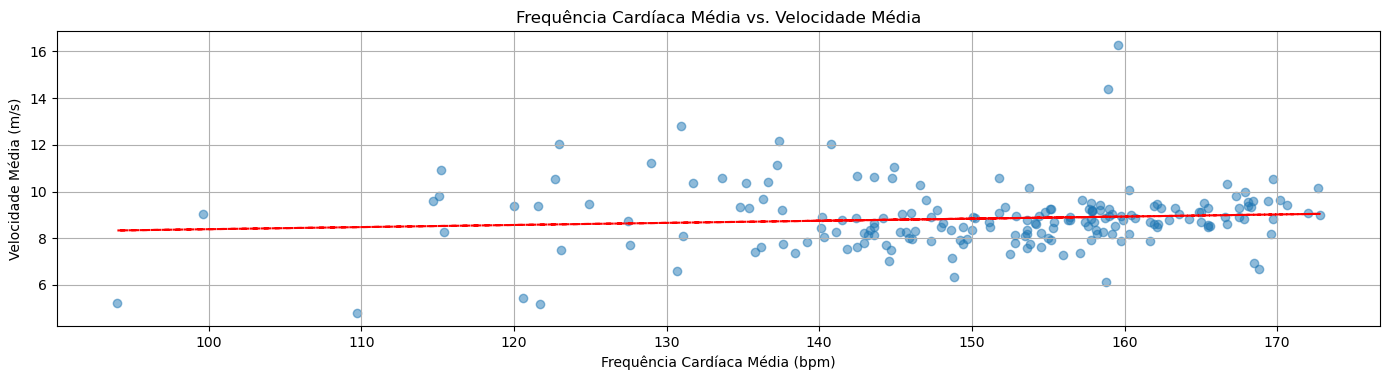

In [42]:
# Relação entre velocidade média e batimentos cardíacos médios
df_calc = df_final[(df_final['sport_type'] == "Corrida")].copy()

plt.figure(figsize=(14, 7))

# Gráfico para frequência cardíaca média vs. velocidade média
plt.subplot(2, 1, 1)
plt.scatter(df_calc['average_heartrate'], df_calc['average_speed'], alpha=0.5)
plt.title('Frequência Cardíaca Média vs. Velocidade Média')
plt.ylabel('Velocidade Média (m/s)')
plt.xlabel('Frequência Cardíaca Média (bpm)')
plt.grid(True)

# Adicione a linha de tendência (regressão linear)
z = np.polyfit(df_calc['average_heartrate'], df_calc['average_speed'], 1)
p = np.poly1d(z)
plt.plot(df_calc['average_heartrate'], p(df_calc['average_heartrate']), 'r--')

plt.tight_layout()
plt.show()

O gráfico “Frequência Cardíaca Média vs. Velocidade Média” mostra a relação entre a velocidade média (em metros por segundo) e a frequência cardíaca média (em batimentos por minuto) durante o exercício físico. Aqui estão as principais observações:
*   Tendência Negativa: O gráfico apresenta uma tendência negativa geral. À medida que a velocidade média aumenta, a frequência cardíaca média tende a diminuir. Isso sugere que, quando você se exercita em alta velocidade, seu coração não precisa bater tão rapidamente quanto em velocidades mais baixas.
*   Aplicações: Essa relação é relevante para atletas, corredores e ciclistas. Pode ser útil para otimizar o treinamento cardiovascular e entender como diferentes intensidades de exercício afetam a frequência cardíaca.
*   Zonas de Treinamento: A interpretação desse gráfico pode ajudar a definir zonas de treinamento com base na velocidade e frequência cardíaca desejadas. Por exemplo, para treinos de resistência, você pode visar uma velocidade moderada com uma frequência cardíaca mais baixa.


Relação entre Velocidade e Frequência Cardíaca:
Em geral, esperaríamos uma relação positiva entre velocidade e frequência cardíaca. Ou seja, quando a velocidade aumenta, a frequência cardíaca também deveria aumentar.
No entanto, seus dados mostraram uma tendência negativa. Isso pode ser explicado por vários fatores.
Possíveis Explicações:
Velocidade Média Baixa (Abaixo de 10 km/h): Se a velocidade média do atleta é baixa, isso pode indicar que ele está realizando treinos mais leves, como corridas de recuperação ou treinos de base. Nessas situações, a frequência cardíaca pode não aumentar significativamente.
Treinos de Tiro de Curtas Distâncias: Quando a velocidade é maior, o atleta pode estar fazendo treinos de tiro (sprints) em curtas distâncias. Esses treinos podem não elevar tanto a frequência cardíaca quanto corridas mais longas.
Outros Fatores: Além disso, outros fatores, como nível de condicionamento físico, terreno, temperatura e individualidade, também influenciam a relação entre velocidade e frequência cardíaca.
Conclusão Definitiva:
Para chegar a uma conclusão definitiva, é importante considerar todos esses fatores e talvez realizar análises mais detalhadas.
Lembre-se de que a correlação não implica causalidade direta. Interpretar os dados com cautela é fundamental.

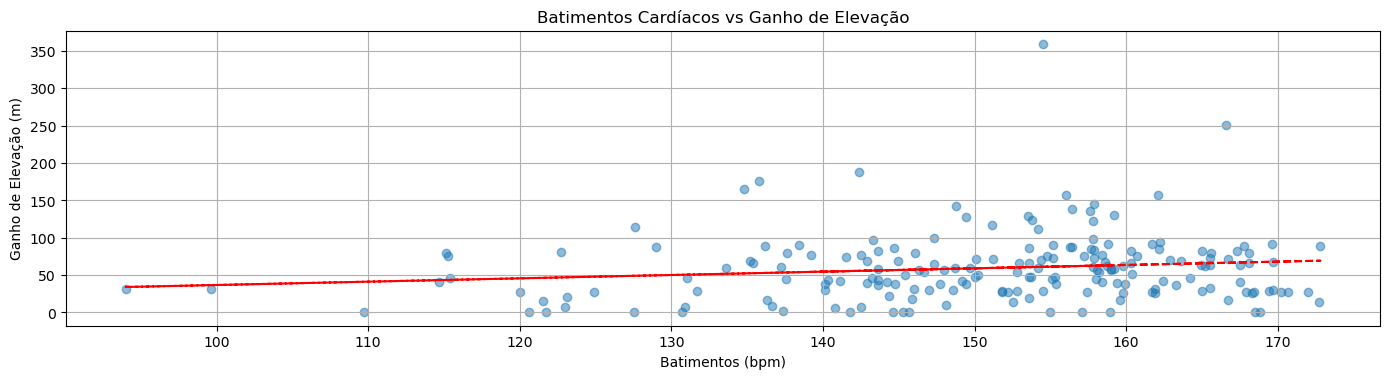

In [43]:
# Frequência Cardíaca vs Elevação
df_calc = df_final[(df_final['sport_type'] == "Corrida")].copy()

# Convertendo km -> m
df_calc['distance'] = df_calc['distance'] * 1000 

# Gráfico para distância vs elevação
plt.figure(figsize=(14, 7))
plt.subplot(2, 1, 1)
plt.scatter(df_calc['average_heartrate'], df_calc['total_elevation_gain'], alpha=0.5)
plt.title('Batimentos Cardíacos vs Ganho de Elevação')
plt.xlabel('Batimentos (bpm)')
plt.ylabel('Ganho de Elevação (m)')
plt.grid(True)

# Adicione a linha de tendência (regressão linear)
z = np.polyfit(df_calc['average_heartrate'], df_calc['total_elevation_gain'], 1)
p = np.poly1d(z)
plt.plot(df_calc['average_heartrate'], p(df_calc['average_heartrate']), 'r--')


plt.tight_layout()
plt.show()

Com base no gráfico “Batimentos Cardíacos vs Ganho de Elevação”, podemos tirar algumas conclusões:

*   Correlação Positiva: O gráfico mostra uma tendência positiva entre o número de batimentos cardíacos por minuto (bpm) e o ganho de elevação. À medida que os batimentos aumentam, o ganho de elevação também tende a aumentar. Isso sugere que atividades mais intensas, que elevam a frequência cardíaca, resultam em maior ganho de elevação.
*   Zona Alvo de Treinamento: Para otimizar o treinamento físico, é importante conhecer sua zona alvo de frequência cardíaca. Essa zona varia com base na idade e no nível de condicionamento físico. Manter-se dentro dessa faixa durante o exercício pode ajudar a maximizar o ganho de elevação.

Zona alvo de frequência cardíaca = [FC máxima - FC repouso] x %intensidade] + FC repouso

FC maxima = 220 - 30 = 190
FC repouso = 60
- Zona leve: 50% a 60% = (130 * 50%) + 60 = 125 - 137 bpm
- Zona moderada: 60% a 70% = (130 * 60%) + 60 = 138 - 150 bpm
- Zona intensa: 70% - 85% = (130 * 70%) + 60 = 151 -  171 bpm

*   Zona Leve (50% a 60% da FC máxima): Ideal para atividades de baixa intensidade, como caminhadas. Ajuda a melhorar a saúde cardiovascular e a queimar calorias.
*   Zona Moderada (60% a 70% da FC máxima): Apropriada para exercícios aeróbicos, como corrida leve ou ciclismo. Melhora a resistência e a queima de gordura.
*   Zona Intensa (70% a 85% da FC máxima): Indicada para treinos mais vigorosos, como corrida rápida ou treinamento intervalado. Melhora o condicionamento cardiovascular e aumenta o gasto calórico.

In [44]:
# 📅 Qual quilometragem foram feitas por semana?
# Criando nº semana
df_final['semana'] = df_final['data'].dt.strftime('%W')

# Novo DF com os dados de Corrida do ano de 2024 somando as distâncias
soma_semanal = df_final[(df_final['ano'] == pd.Timestamp('today').year) & (df_final['sport_type'] == 'Corrida')].groupby('semana')['distance'].sum().reset_index()

# Ultima semana com registro
ultima_semana = int(max(df_final['semana']))

# segundo DF com todas as semanas até a última definida
todas_semanas = pd.DataFrame({'semana': range(1, ultima_semana)})

todas_semanas['semana'] = todas_semanas['semana'].astype(int)
soma_semanal['semana'] = soma_semanal['semana'].astype(int)

# Junção dos DF, quando a semana não teve movimento carregar 0
semana_distance = pd.merge(todas_semanas, soma_semanal, on='semana', how='left').fillna(0)

In [45]:
semana_distance.columns = ['Semana', 'Distancia']

# Plotar o gráfico
fig = px.bar(semana_distance, x='Semana', y='Distancia', title=f"Distância Percorrida por Semana em {pd.Timestamp('today').year}")

# Adicione rótulos de dados às barras
fig.update_traces(texttemplate='%{y}')

fig.show()
fig.write_image("../reports/img/distancia_semanal.png")

Vamos analisar as distâncias percorridas semanalmente durante o ano de 2024. Até a semana 08, a distância se manteve constante. A partir da semana 9, houve um declínio. Não temos dados para as semanas 10, 12, 13, 14, 15, 16 e 17, período em que o indivíduo estava se recuperando de uma lesão. A partir da semana 18, observamos uma evolução gradual na quilometragem.

In [46]:
# 📅 Qual duração foram feitas por semana?
# Novo DF com os dados do ano de 2024 somando a duração das atividades
soma_semanal = df_final[(df_final['ano'] == pd.Timestamp('today').year)].groupby('semana')['duracao_atividade'].sum().reset_index()

# Ultima semana com registro
ultima_semana = int(max(df_final['semana']))

# segundo DF com todas as semanas até a última definida
todas_semanas = pd.DataFrame({'semana': range(1, ultima_semana)})

todas_semanas['semana'] = todas_semanas['semana'].astype(int)
soma_semanal['semana'] = soma_semanal['semana'].astype(int)

# Junção dos DF, quando a semana não teve movimento carregar 0
semana_duracao = pd.merge(todas_semanas, soma_semanal, on='semana', how='left').fillna(0)

In [47]:
semana_duracao.columns = ['Semana', 'Duração']

semana_duracao['Duração'] = semana_duracao['Duração']/3600

# Plotar o gráfico
fig = px.bar(semana_duracao, x='Semana', y='Duração', title=f"Duração das Atividades por Semana em {pd.Timestamp('today').year}")

# Adicione rótulos de dados às barras
fig.update_traces(texttemplate='%{y}')

fig.show()
fig.write_image("../reports/img/duracao_semanal_2024.png")

In [48]:
# 📅 Qual elevação foram feitas por semana?
# Novo DF com os dados de 2024 somando a elevação das atividades
soma_semanal = df_final[(df_final['ano'] == pd.Timestamp('today').year) & (df_final['total_elevation_gain'] > 0)].groupby('semana')['total_elevation_gain'].sum().reset_index()

# Ultima semana com registro
ultima_semana = int(max(df_final['semana']))

# segundo DF com todas as semanas até a última definida
todas_semanas = pd.DataFrame({'semana': range(1, ultima_semana)})

todas_semanas['semana'] = todas_semanas['semana'].astype(int)
soma_semanal['semana'] = soma_semanal['semana'].astype(int)

# Junção dos DF, quando a semana não teve movimento carregar 0
semana_elevacao = pd.merge(todas_semanas, soma_semanal, on='semana', how='left').fillna(0)

In [49]:
semana_elevacao.columns = ['Semana', 'Elevação']

# Plotar o gráfico
fig = px.line(semana_elevacao, x='Semana', y='Elevação', title=f"Elevação Percorrida por Semana em {pd.Timestamp('today').year}")

# Adicione rótulos de dados às barras
fig.update_traces(texttemplate='%{y}')

fig.show()
fig.write_image("../reports/img/altitude_semanal_2024.png")

#### Dia da Semana com Mais Quilômetros Rodados:
*   Soma total da distância percorrida para cada dia da semana e determinar qual dia tem a maior quilometragem acumulada.

In [50]:
df['semana'] = df['data'].dt.strftime('%W')

df['dia_da_semana'] = df['data'].dt.dayofweek

dias = {0: 'Segunda-feira', 1: 'Terça-feira', 2: 'Quarta-feira', 3: 'Quinta-feira', 4: 'Sexta-feira', 5: 'Sábado', 6: 'Domingo'}

df['nome_do_dia'] = df['data'].dt.strftime('%A')

In [51]:
# Dias da semana com maior distância
df_distancia = df.copy()
df_distancia = df_distancia[df_distancia['distance'] > 0]

# Criando DF dias da semana | Média de distância
df_distancia = df_distancia.groupby('dia_da_semana')['distance'].sum().reset_index()
# Renomear colunas
df_distancia.columns = ['Dia da Semana', 'Distância (km)']

# Gráfico
fig = px.bar(df_distancia, x='Dia da Semana', y='Distância (km)', title='Total de km rodados por dias da semana [Seg - Dom]')

# Adicione rótulos de dados às barras
fig.update_traces(texttemplate='%{y}')

fig.show()
fig.write_image("../reports/img/dia_semana_volume_km.png")

#### Dia da Semana com Treinos Mais Pesados:
*   Segundo a métrica distância;
*   Segundo a métrica elevação;
*   Segundo a métrica tempo em movimento;
*   Segundo o esforço, onde a fórmula geral é = w1x*distância normalizada + w2x*elevação normalizada + w3x*frequência cardíaca normalizada.

In [52]:
# Dias da semana com maior distância
df_distancia = df.copy()
df_distancia = df_distancia[df_distancia['distance'] > 0]

# Criando DF dias da semana | Média de distância
df_distancia = df_distancia.groupby('semana')['distance'].mean().reset_index()
# Renomear colunas
df_distancia.columns = ['Dia da Semana', 'Distância (km)']

# Gráfico
fig = px.bar(df_distancia, x='Dia da Semana', y='Distância (km)', title='Média de distância por dias da semana [Seg - Dom]')

# Adicione rótulos de dados às barras
fig.update_traces(texttemplate='%{y}')

fig.show()
fig.write_image("../reports/img/media_distancia_semana.png")

In [53]:
# Dias da semana com maior elevação nos treinos
df_elevacao = df.copy()
df_elevacao = df_elevacao[df_elevacao['total_elevation_gain'] > 0]

# Criando DF dias da semana | Média de Ganho de Elevação
df_elevacao = df_elevacao.groupby(['semana', 'sport_type'])['total_elevation_gain'].mean().reset_index()
# Renomear colunas
df_elevacao.columns = ['Dia da Semana', 'Esporte', 'Elevação (m)']

# Gráfico
fig = px.bar(df_elevacao, x='Dia da Semana', y='Elevação (m)', color='Esporte', title='Média de ganho de elevação por dias da semana [Seg - Dom]')

# Adicione rótulos de dados às barras
fig.update_traces(texttemplate='%{y}')

fig.show()
fig.write_image("../reports/img/elevacao_semana.png")

In [54]:
# Dias da semana com mais tempo treinando
df_weekday = df.copy()
df_weekday['duracao'] = pd.to_timedelta(df_weekday['duracao_atividade'], unit='s')

# Calculo para resultado ser lido HH,MM
df_weekday['duracao'] = (df_weekday['duracao'].dt.components['hours'].astype(str) + '.' + df_weekday['duracao'].dt.components['minutes'].astype(str)).astype(float)

# Criando DF dias da semana | Média de Duração
df_weekday = df_weekday.groupby('semana')['duracao'].mean().reset_index()

# Arredonda a média da duração para duas casas decimais
df_weekday['duracao'] = df_weekday['duracao'].round(2)

# Renomear colunas
df_weekday.columns = ['Dia da Semana', 'Duração (h)']

# Gráfico
fig = px.bar(df_weekday, x='Dia da Semana', y='Duração (h)', title='Média de treino por dias da semana [Seg - Dom]')

# Adicione rótulos de dados às barras
fig.update_traces(texttemplate='%{y}')

fig.show()
fig.write_image("../reports/img/media_treino_semana.png")

In [55]:
# Calcular esforço por dia da semana
df_esforco = df.copy()

# Normalização das métricas (entre 0 e 1)
df_esforco['distancia_normalizada'] = (df_esforco['distance'] - df_esforco['distance'].min()) / (df_esforco['distance'].max() - df_esforco['distance'].min())
df_esforco['elevacao_normalizada'] = (df_esforco['total_elevation_gain'] - df_esforco['total_elevation_gain'].min()) / (df_esforco['total_elevation_gain'].max() - df_esforco['total_elevation_gain'].min())
df_esforco['freq_cardiaca_normalizada'] = (df_esforco['average_heartrate'] - df_esforco['average_heartrate'].min()) / (df_esforco['average_heartrate'].max() - df_esforco['average_heartrate'].min())

def descobre_pesos(df_esforco):

    pesos = list(itertools.product([0.2, 0.3, 0.4], repeat=3))

    # Calcula o índice de esforço para cada combinação de pesos
    resultados = []
    
    for pesos in pesos:
        indice_esforco = (
            pesos[0] * df_esforco['distancia_normalizada'] +
            pesos[1] * df_esforco['elevacao_normalizada'] +
            pesos[2] * df_esforco['freq_cardiaca_normalizada']
        )
        resultados.append((pesos, indice_esforco.mean()))

    # Encontre a combinação com o maior índice de esforço médio
    melhor_combinacao = max(resultados, key=lambda x: x[1])[0]

    return melhor_combinacao

peso_distancia, peso_elevacao, peso_freq_cardiaca = descobre_pesos(df_esforco)

# Cálculo do índice de esforço
df_esforco['indice_esforco'] = (
    peso_distancia * df_esforco['distancia_normalizada'] +
    peso_elevacao * df_esforco['elevacao_normalizada'] +
    peso_freq_cardiaca * df_esforco['freq_cardiaca_normalizada']
)

# DF com esforço por dias da semana
df_esforco = df_esforco.groupby('nome_do_dia')['indice_esforco'].mean().reset_index()

# Renomear colunas
df_esforco.columns = ['Dias da Semana', 'Índice de Esforço']

# Gráfico
fig = px.bar(df_esforco, x='Dias da Semana', y='Índice de Esforço', title='Dias da Semana com Maior Índice de Esforço')

# Rótulos de dados
fig.update_traces(texttemplate='%{y}')

fig.show()
fig.write_image("../reports/img/dias_semana.png")

NameError: name 'itertools' is not defined

#### Dia da Semana com Mais Atividades:
*   Número de atividades realizadas em cada dia da semana;
*   Qual o dia de maior presença;
*   Qual o dia menos atlético.

In [56]:
# Dias da semana mais faltantes
df_contagem_dia = df.copy()

df_contagem_dia = df.groupby('dia_da_semana').size().reset_index()

# Renomear colunas
df_contagem_dia.columns = ['Dias da Semana', 'Presença']

# Gráfico
fig = px.bar(df_contagem_dia, x='Dias da Semana', y='Presença', title='Presença nos Treinos por Dias da Semana')

# Rótulos de dados
fig.update_traces(texttemplate='%{y}')

fig.show()
fig.write_image("../reports/img/presenca_treinos_dias_semana.png")